# Assignment#5-1

```bash
수업 : 컴퓨터 비전(Computer Vision
교수님 : 김낙현 교수님

이름 : 김주원
학과 : 컴퓨터전자시스템공학부
학번 : 201600765
과제제출일 : 2022-05-20
```

## 과제 내용
####  1. 여기에서 다룬 Cifar-10 프로그램을 Epoch=20 으로 설정하여 실험을 수행하고 결과의 정확도를 측정하라.
- 과제 수행방법: 8장 기계학습 D 실습 내용을 활용해서 코딩을 진행하였습니다. 

- 결과 : 아래에 보이시는 것처럼 학습의 loss값은 0.3480 accuracy는 0.8782입니다. 또한 validation에 대한 accuracy는 0.7482와 loss 0.9107 는 입니다. 그리고 테스트 데이터의 정확도는 0.7275입니다. Epoch=4를 했을 때와 비교하여 학습, 테스트에 대한 성능이 모두 상승했음을 알 수 있습니다. 학습 데이터에 대한 정확도가 0.7014에서 0.8782로 상승했으며, 테스트 데이터에 대한 정확도가 0.6829에서 0.7482로 크게 상승했음을 알 수 있습니다. 또한 학습 과정의 검증데이터인 validation accuracy에 대한 accuracy도 0.6994에서 0.7275로 개선된 것을 확인하실 수 있습니다. 즉, 학습, 검증, 테스트 데이터에 대한 정확도가 Epoch=20일 때 훨씬 더 잘 수렴했음을 알 수 있습니다.

아래 내용은 Epoch=4로 코드를 돌렸을 때 accuracy 및 loss이며(따로 kernel를 restart하여 Epoch=4로 코드를 돌려봤습니다.)
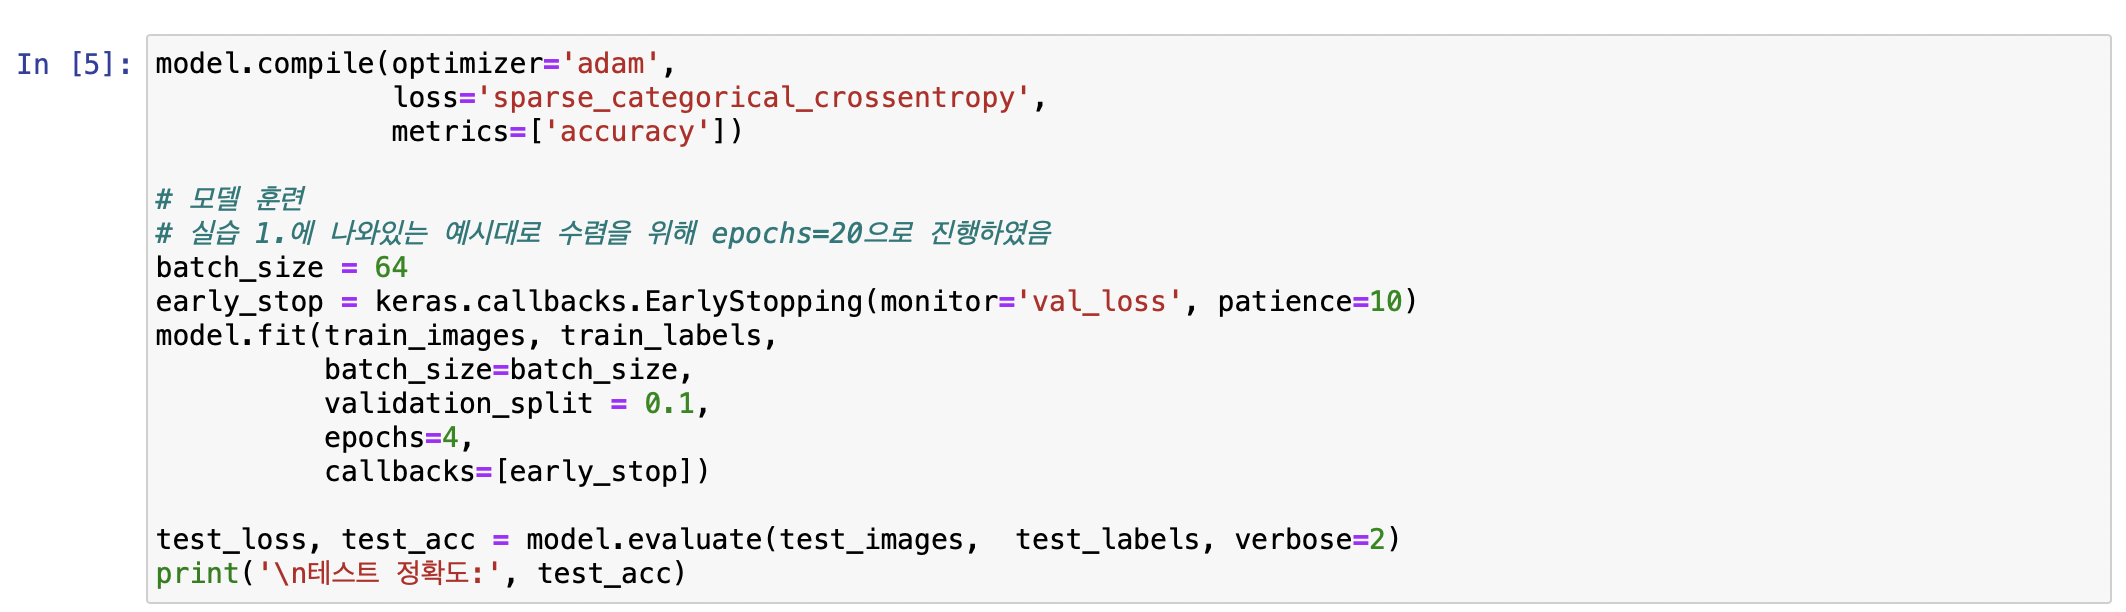
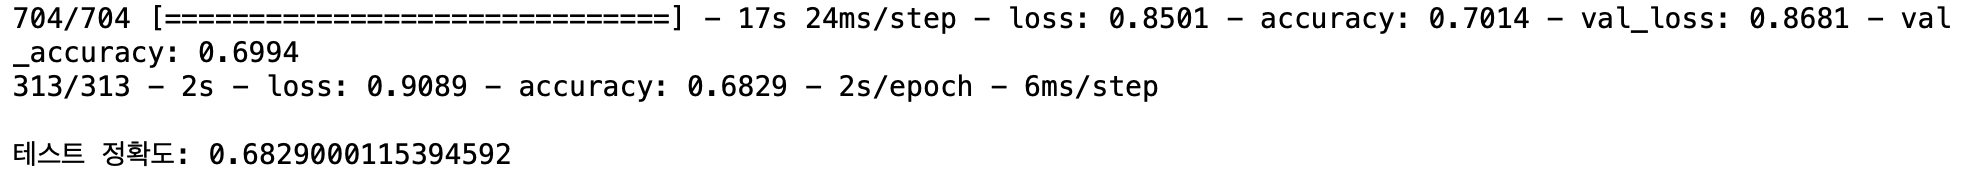

## 관련 라이브러리 및 패키지 import 

In [1]:
import tensorflow as tf
from tensorflow import keras
from keras import models
from keras import layers

# 관련 패키지
import numpy as np
import matplotlib.pyplot as plt

## Cifar 데이터 읽어 오기
- Keras data로 읽을 수 있음

In [2]:
# 영상 파일 읽기
cifar10 = keras.datasets.cifar10

(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

## 영상 전처리
- 영상의 픽셀값이 [0, 255]로 되어있는데, [0,1] 범위로 변경

In [3]:
train_images = train_images / 255.0
test_images = test_images / 255.0

## Keras 신경망
- 신경망 구조
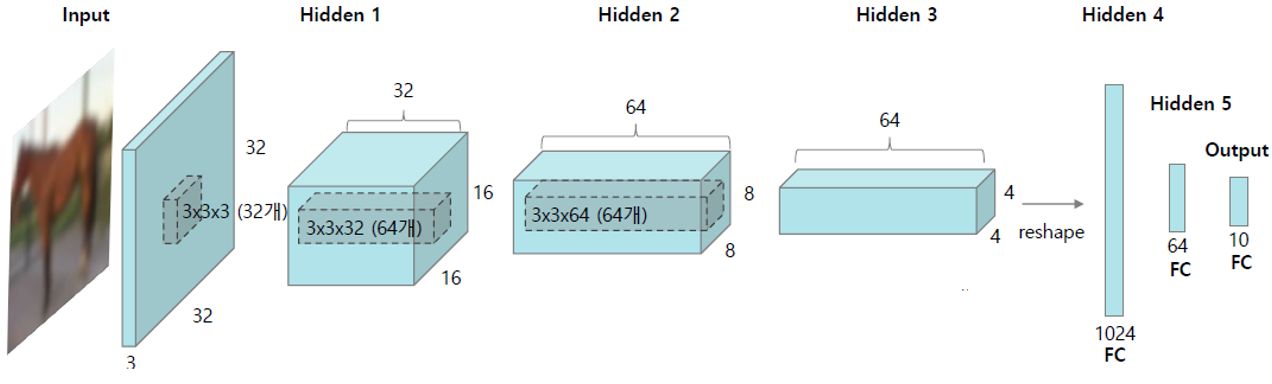

In [4]:
model = models.Sequential()

model.add(layers.Conv2D(32, (3,3), padding="SAME", activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3,3), padding="SAME", activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3,3), padding="SAME", activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())#  (4, 4, 64) 출력을 1,024 크기로 펼침
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# 파라미터 수 읽기
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 64)          36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 4, 4, 64)         0

## 모델 훈련 부분 구현

In [5]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# 모델 훈련
# 실습 1.에 나와있는 예시대로 수렴을 위해 epochs=20으로 진행하였음
batch_size = 64
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)
model.fit(train_images, train_labels,
          batch_size=batch_size,
          validation_split = 0.1,
          epochs=20,
          callbacks=[early_stop])

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print('\n테스트 정확도:', test_acc)

2022-05-19 11:46:56.073932: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


Epoch 1/20
704/704 [==============================] - 16s 23ms/step - loss: 1.5583 - accuracy: 0.4327 - val_loss: 1.3245 - val_accuracy: 0.5274
Epoch 2/20
704/704 [==============================] - 17s 24ms/step - loss: 1.1530 - accuracy: 0.5922 - val_loss: 1.0593 - val_accuracy: 0.6264
Epoch 3/20
704/704 [==============================] - 17s 24ms/step - loss: 0.9858 - accuracy: 0.6560 - val_loss: 0.9458 - val_accuracy: 0.6730
Epoch 4/20
704/704 [==============================] - 16s 23ms/step - loss: 0.8945 - accuracy: 0.6859 - val_loss: 0.8791 - val_accuracy: 0.6974
Epoch 5/20
704/704 [==============================] - 17s 25ms/step - loss: 0.8159 - accuracy: 0.7160 - val_loss: 0.9278 - val_accuracy: 0.6846
Epoch 6/20
704/704 [==============================] - 17s 24ms/step - loss: 0.7605 - accuracy: 0.7342 - val_loss: 0.8028 - val_accuracy: 0.7306
Epoch 7/20
704/704 [==============================] - 17s 24ms/step - loss: 0.7097 - accuracy: 0.7529 - val_loss: 0.8282 - val_accuracy:

## 실험 영상 보기




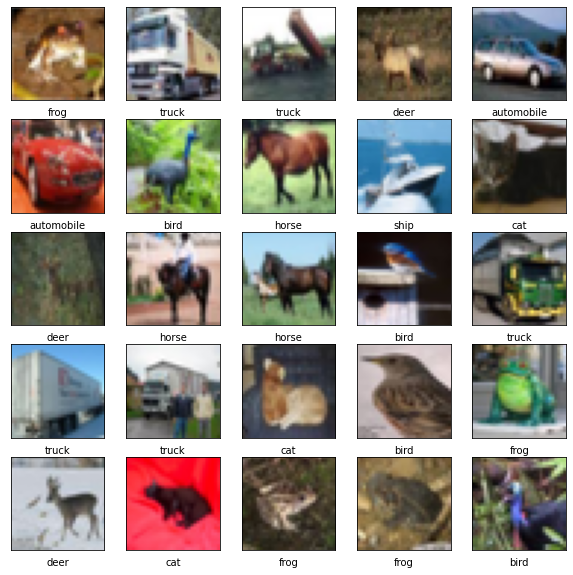

In [6]:
# 클래스 이름 설정 
# class 명칭을 지정해 줌
class_names = [
    "airplane",
    "automobile",
    "bird",
    "cat",
    "deer",
    "dog",
    "frog",
    "horse",
    "ship",
    "truck",
]

train_labels = train_labels.flatten()
test_labels = test_labels.flatten()

# Train image 25장 디스플레이
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

## Test 영상 예측 결과 display 함수

In [7]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    plt.imshow(img)
    
    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

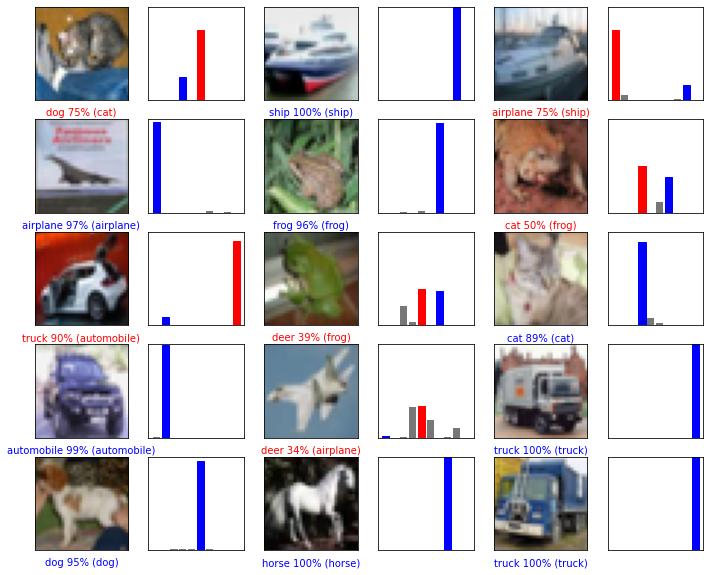

In [8]:
predictions = model.predict(test_images)

# 처음 X 개의 테스트 이미지와 예측 레이블, 진짜 레이블을 출력
# 올바른 예측은 파랑색으로 잘못된 예측은 빨강색으로 표시
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions, test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions, test_labels)
plt.show()